In [1]:
#Importing data from csv
from pandas import read_csv
import pandas as pd
from matplotlib.pyplot import figure
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
plt.rcParams['figure.dpi'] = 100

protoss_data = read_csv('../Output/ProtossMarch.csv', header=0, index_col=False)
zerg_data = read_csv('../Output/ZergMarch.csv', header=0, index_col=False)

demoP = read_csv('../Output/wedDemoProtoss.csv', header=0, index_col=False)
display(demoP)

demoZ = read_csv('../Output/wedDemoZerg.csv', header=0, index_col=False)
display(demoZ)

,match_id,map_name,region,game_length,race,enemy_race,ap30s,frame,second,player,...,stalker,stargate,tempest,templararchive,twilightcouncil,voidray,warpgate,warpprism,zealot,win
0,233,Eternal Empire LE,us,926,P,Z,0.0,1,0,Player 1 - Stats (Protoss),...,0,0,0,0,0,0,0,0,0,1
1,233,Eternal Empire LE,us,926,P,Z,116.2,480,30,Player 1 - Stats (Protoss),...,0,0,0,0,0,0,0,0,0,1
2,233,Eternal Empire LE,us,926,P,Z,124.6,960,60,Player 1 - Stats (Protoss),...,0,0,0,0,0,0,1,0,0,1
3,233,Eternal Empire LE,us,926,P,Z,196.0,1440,90,Player 1 - Stats (Protoss),...,0,0,0,0,0,0,1,0,0,1
4,233,Eternal Empire LE,us,926,P,Z,165.2,1920,120,Player 1 - Stats (Protoss),...,0,0,0,0,0,0,1,0,0,1
5,233,Eternal Empire LE,us,926,P,Z,137.2,2400,150,Player 1 - Stats (Protoss),...,0,0,0,0,0,0,1,0,0,1
6,233,Eternal Empire LE,us,926,P,Z,168.0,2880,180,Player 1 - Stats (Protoss),...,0,0,0,0,0,0,1,0,0,1
7,233,Eternal Empire LE,us,926,P,Z,182.0,3360,210,Player 1 - Stats (Protoss),...,0,1,0,0,0,0,1,0,0,1
8,233,Eternal Empire LE,us,926,P,Z,177.8,3840,240,Player 1 - Stats (Protoss),...,0,1,0,0,0,0,1,0,0,1
9,233,Eternal Empire LE,us,926,P,Z,140.0,4320,270,Player 1 - Stats (Protoss),...,0,1,0,0,0,0,1,0,0,1


,match_id,map_name,region,game_length,race,enemy_race,ap30s,frame,second,player,...,spawningpool,spinecrawler,spire,sporecrawler,swarmhost,ultralisk,ultraliskcavern,viper,zergling,win
0,273,Eternal Empire LE,us,926,Z,P,0.0,1,0,Player 2 - Scarlett (Zerg),...,0,0,0,0,0,0,0,0,0,0
1,273,Eternal Empire LE,us,926,Z,P,166.6,480,30,Player 2 - Scarlett (Zerg),...,0,0,0,0,0,0,0,0,0,0
2,273,Eternal Empire LE,us,926,Z,P,154.0,960,60,Player 2 - Scarlett (Zerg),...,0,0,0,0,0,0,0,0,0,0
3,273,Eternal Empire LE,us,926,Z,P,280.0,1440,90,Player 2 - Scarlett (Zerg),...,0,0,0,0,0,0,0,0,0,0
4,273,Eternal Empire LE,us,926,Z,P,313.6,1920,120,Player 2 - Scarlett (Zerg),...,1,0,0,0,0,0,0,0,0,0
5,273,Eternal Empire LE,us,926,Z,P,389.2,2400,150,Player 2 - Scarlett (Zerg),...,1,0,0,0,0,0,0,0,0,0
6,273,Eternal Empire LE,us,926,Z,P,145.6,2880,180,Player 2 - Scarlett (Zerg),...,1,0,0,0,0,0,0,0,0,0
7,273,Eternal Empire LE,us,926,Z,P,127.4,3360,210,Player 2 - Scarlett (Zerg),...,1,0,0,0,0,0,0,0,2,0
8,273,Eternal Empire LE,us,926,Z,P,128.8,3840,240,Player 2 - Scarlett (Zerg),...,1,0,0,0,0,0,0,0,2,0
9,273,Eternal Empire LE,us,926,Z,P,148.4,4320,270,Player 2 - Scarlett (Zerg),...,1,0,0,0,0,0,0,0,4,0


In [2]:
new_dataP = pd.concat([protoss_data.reset_index(drop=True), demoP.reset_index(drop=True)], axis=0, ignore_index=True)
new_dataZ = pd.concat([zerg_data.reset_index(drop=True), demoZ.reset_index(drop=True)], axis=0, ignore_index=True)

In [3]:
#Standardization Protoss

from sklearn.preprocessing import StandardScaler

no_standardize = ['match_id','map_name','region','race','enemy_race','frame','second','player','game_length','win']

#Names of Columns that we do want to Standardize
standardize_columns = [x for x in list(new_dataP) if x not in no_standardize]

#Standardizing these columns
stand = new_dataP[standardize_columns].values
stand_scaled = StandardScaler().fit_transform(stand)
protoss_data_standardized = pd.DataFrame(stand_scaled, columns=standardize_columns, index=new_dataP.index)

#One-hot Encoding the categorical variables
protoss_data_standardized = protoss_data_standardized.join(pd.get_dummies(new_dataP['map_name'], prefix='Map'))
protoss_data_standardized = protoss_data_standardized.join(pd.get_dummies(new_dataP['region'], prefix='Region'))
protoss_data_standardized = protoss_data_standardized.join(pd.get_dummies(new_dataP['enemy_race'], prefix='Enemy'))
protoss_data_standardized = protoss_data_standardized.join(new_dataP['win'])

In [4]:
#Standardization Zerg

no_standardize = ['match_id','map_name','region','race','enemy_race','frame','second','player','game_length','win']

#Names of Columns that we do want to Standardize
standardize_columns = [x for x in list(new_dataZ) if x not in no_standardize]

#Standardizing these columns
stand = new_dataZ[standardize_columns].values
stand_scaled = StandardScaler().fit_transform(stand)
zerg_data_standardized = pd.DataFrame(stand_scaled, columns=standardize_columns, index=new_dataZ.index)

#One-hot Encoding the categorical variables
zerg_data_standardized = zerg_data_standardized.join(pd.get_dummies(new_dataZ['map_name'], prefix='Map'))
zerg_data_standardized = zerg_data_standardized.join(pd.get_dummies(new_dataZ['region'], prefix='Region'))
zerg_data_standardized = zerg_data_standardized.join(pd.get_dummies(new_dataZ['enemy_race'], prefix='Enemy'))
zerg_data_standardized = zerg_data_standardized.join(new_dataZ['win'])

In [5]:
#Split data into dependent and independent variables Protoss
no_X = ['win']
yes_X = [x for x in list(protoss_data_standardized) if x not in no_X]

Y_Protoss = protoss_data_standardized['win']
X_standardized_Protoss = protoss_data_standardized[yes_X]

In [6]:
#Split data into dependent and independent variables Zerg
no_X = ['win']
yes_X = [x for x in list(zerg_data_standardized) if x not in no_X]

Y_Zerg = zerg_data_standardized['win']
X_standardized_Zerg = zerg_data_standardized[yes_X]

In [7]:
#Split data into training, validation and testing set Protoss
train_split = 0.8
val_split = 0.2

num_data = len(protoss_data)
num_val = int(val_split * num_data)
num_train = int(train_split * num_data)
num_test = len(demoP)

Y_trainP = Y_Protoss[0:num_train]
Y_valP = Y_Protoss[num_train:(num_train + num_val)+1]
Y_testP = Y_Protoss[(num_val + num_train)+1:]


X_standardized_Protoss_train = X_standardized_Protoss[0:num_train]
X_standardized_Protoss_val = X_standardized_Protoss[num_train:(num_train + num_val)]
X_standardized_Protoss_test = X_standardized_Protoss[(num_val + num_train)+1:]

Y_Time = []
timer = 0;
for i in Y_testP:
    Y_Time.append(timer)
    timer += 21

In [8]:
#Split data into training, validation and testing set Protoss
train_split = 0.8
val_split = 0.2

num_data = len(zerg_data)
num_val = int(val_split * num_data)
num_train = int(train_split * num_data)
num_test = len(demoZ)

Y_trainZ = Y_Zerg[0:num_train]
Y_valZ = Y_Zerg[num_train:(num_train + num_val)+1]
Y_testZ = Y_Zerg[(num_val + num_train)+1:]

X_standardized_Zerg_train = X_standardized_Zerg[0:num_train]
X_standardized_Zerg_val = X_standardized_Zerg[num_train:(num_train + num_val)]
X_standardized_Zerg_test = X_standardized_Zerg[(num_val + num_train)+1:]

In [9]:
knn_model = KNeighborsClassifier(n_neighbors=5)

In [10]:
knn_Protoss = knn_model.fit(X_standardized_Protoss_train , Y_trainP)
knn_probProtoss = knn_Protoss.predict_proba(X_standardized_Protoss_test)
knn_predProtoss = knn_Protoss.predict(X_standardized_Protoss_test)

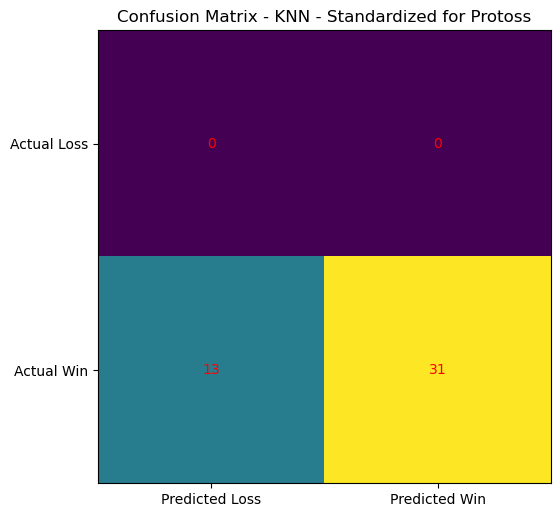

In [11]:
knn_Protoss_cmP = confusion_matrix(Y_testP, knn_predProtoss)
fig, ax = plt.subplots(figsize=(6,6))
ax.imshow(knn_Protoss_cmP)
ax.grid(False)
ax.xaxis.set(ticks=(0, 1), ticklabels=('Predicted Loss', 'Predicted Win'))
ax.yaxis.set(ticks=(0, 1), ticklabels=('Actual Loss', 'Actual Win'))
ax.set_ylim(1.5, -0.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i, knn_Protoss_cmP[i, j], ha='center', va='center', color='red')
plt.title('Confusion Matrix - KNN - Standardized for Protoss')
plt.show()

In [12]:
#Standardized Result Protoss
print(classification_report(Y_testP, knn_predProtoss, zero_division=1))

              precision    recall  f1-score   support

           0       0.00      1.00      0.00         0
           1       1.00      0.70      0.83        44

    accuracy                           0.70        44
   macro avg       0.50      0.85      0.41        44
weighted avg       1.00      0.70      0.83        44



In [13]:
knn_Zerg = knn_model.fit(X_standardized_Zerg_train, Y_trainZ)
knn_probZerg = knn_Zerg.predict_proba(X_standardized_Zerg_test)
knn_predZerg = knn_Zerg.predict(X_standardized_Zerg_test)

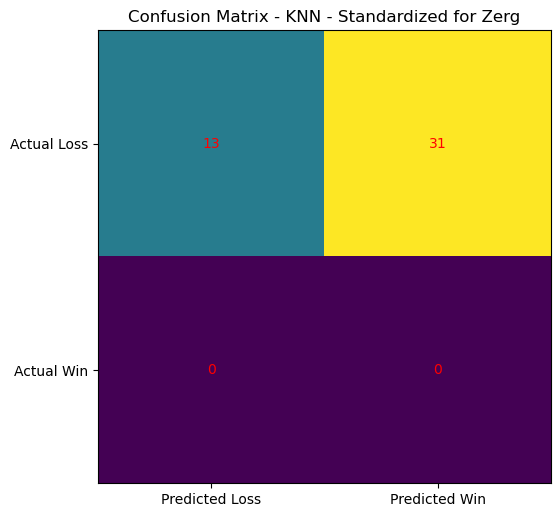

In [14]:
knn_Zerg_cmP = confusion_matrix(Y_testZ, knn_predZerg)
fig, ax = plt.subplots(figsize=(6,6))
ax.imshow(knn_Zerg_cmP)
ax.grid(False)
ax.xaxis.set(ticks=(0, 1), ticklabels=('Predicted Loss', 'Predicted Win'))
ax.yaxis.set(ticks=(0, 1), ticklabels=('Actual Loss', 'Actual Win'))
ax.set_ylim(1.5, -0.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i, knn_Zerg_cmP[i, j], ha='center', va='center', color='red')
plt.title('Confusion Matrix - KNN - Standardized for Zerg')
plt.show()

In [15]:
#Standardized Zerg Result
print(classification_report(Y_testZ, knn_predZerg, zero_division=1))

              precision    recall  f1-score   support

           0       1.00      0.30      0.46        44
           1       0.00      1.00      0.00         0

    accuracy                           0.30        44
   macro avg       0.50      0.65      0.23        44
weighted avg       1.00      0.30      0.46        44



In [17]:
winProtoss = []
winZerg = []

for i in range(len(Y_testP)):
    winProtoss.append(knn_probProtoss[i][1])
    
for i in range(len(Y_testZ)):
    winZerg.append(knn_probZerg[i][1])

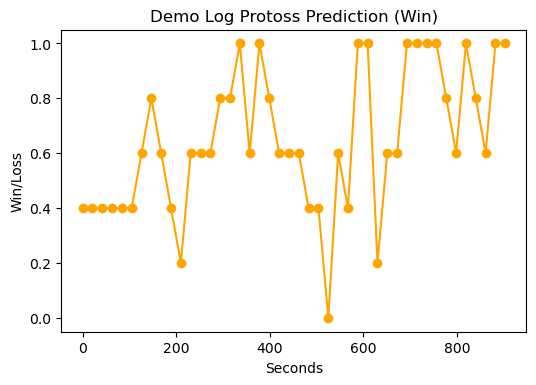

In [18]:
plt.scatter(Y_Time, winProtoss, color='orange')
plt.plot(Y_Time, winProtoss, color='orange')
plt.xlabel('Seconds')
plt.ylabel('Win/Loss')
plt.title('Demo Log Protoss Prediction (Win)')
plt.show()

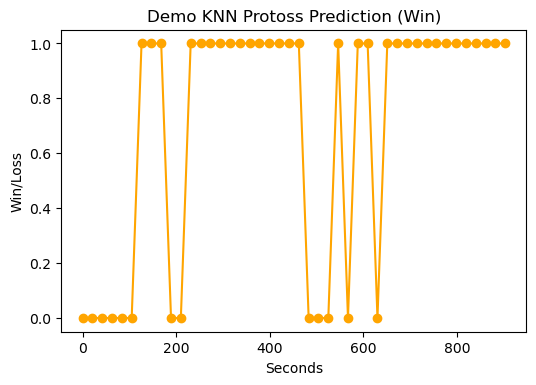

In [19]:
plt.scatter(Y_Time, knn_predProtoss, color='orange')
plt.plot(Y_Time, knn_predProtoss, color='orange')
plt.xlabel('Seconds')
plt.ylabel('Win/Loss')
plt.title('Demo KNN Protoss Prediction (Win)')
plt.show()

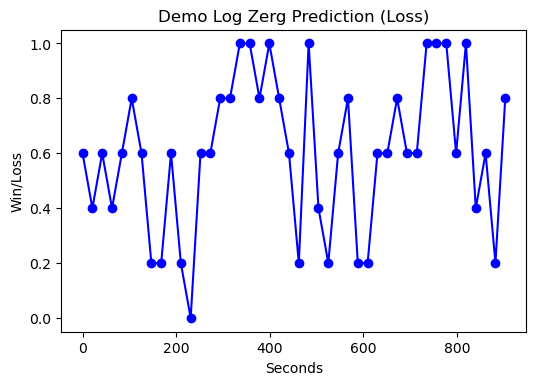

In [20]:
plt.scatter(Y_Time, winZerg, color='blue')
plt.plot(Y_Time, winZerg, color='blue')
plt.xlabel('Seconds')
plt.ylabel('Win/Loss')
plt.title('Demo Log Zerg Prediction (Loss)')
plt.show()

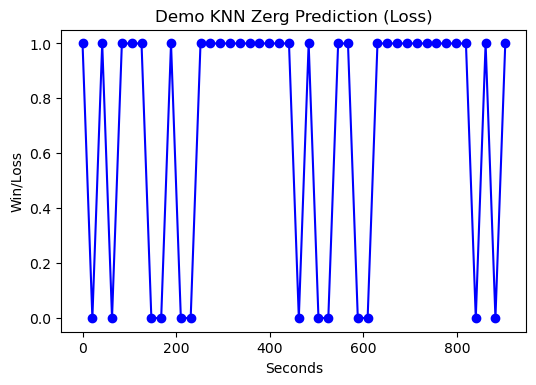

In [21]:
plt.scatter(Y_Time, knn_predZerg, color='blue')
plt.plot(Y_Time, knn_predZerg, color='blue')
plt.xlabel('Seconds')
plt.ylabel('Win/Loss')
plt.title('Demo KNN Zerg Prediction (Loss)')
plt.show()